In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import polars as pl
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive                       #This is to import the datasets which are uploaded to Google drive
drive.mount('/content/drive')
from sklearn.model_selection import GridSearchCV
#from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

Mounted at /content/drive


In [3]:
Df = pl.read_csv('/content/drive/MyDrive/Datasets/US Accidents/US_Accidents_March23.csv',n_rows = 1000500)

In [4]:
Df.head(5)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,null,null,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""","""2016-02-08 05:58:00""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,null,null,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""","""2016-02-08 05:51:00""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,null,null,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""","""2016-02-08 06:56:00""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:23:34""","""2016-02-08 07:53:34""",39.747753,-84.205582,null,null,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""","""2016-02-08 07:38:00""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:39:07""","""2016-02-08 08:09:07""",39.627781,-84.188354,null,null,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""","""2016-02-08 07:53:00""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


In [5]:
Df.describe()

statistic,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str
"""count""","""1000500""","""1000500""",1.0005e6,"""1000500""","""1000500""",1.0005e6,1.0005e6,"""0""","""0""",1.0005e6,"""1000499""","""998788""","""1000472""","""1000500""","""1000500""","""1000364""","""1000500""","""1000047""","""999066""","""990569""",985192.0,539898.0,983937.0,988118.0,981562.0,"""986920""",900092.0,525177.0,"""982282""",1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,"""998864""","""998864""","""998864""","""998864"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,0.0,"""1000500""","""1000500""",0.0,"""1""","""1712""","""28""","""0""","""0""","""136""","""0""","""453""","""1434""","""9931""",15308.0,460602.0,16563.0,12382.0,18938.0,"""13580""",100408.0,475323.0,"""18218""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""1636""","""1636""","""1636""","""1636"""
"""mean""",null,null,2.320224,null,null,36.058837,-94.750544,null,null,0.167532,null,null,null,null,null,null,null,null,null,null,64.626661,59.457691,66.029973,29.693456,9.173896,null,7.767402,0.013247,null,0.013918,0.000321,0.129516,0.006232,0.056812,0.002171,0.00933,0.000027,0.027968,0.029207,0.000887,0.209889,0.0,null,null,null,null
"""std""",null,null,0.548461,null,null,4.906894,17.388672,null,null,1.427759,null,null,null,null,null,null,null,null,null,null,17.450303,21.930264,21.888529,0.792037,2.259134,null,5.407576,0.203059,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""A-1""","""Source2""",1.0,"""2016-02-08 05:46:00""","""2016-02-08 06:37:59""",24.5548,-124.497414,null,null,0.0,""" middle lane blocked due to ac…","""00-199 Fair Lawn Pkwy""","""Aaronsburg""","""Abbeville""","""AL""","""01001""","""US""","""US/Central""","""K01M""","""2016-02-08 05:51:00""",-77.8,-50.0,1.0,0.12,0.0,"""CALM""",0.0,0.0,"""Blowing Dust""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""25%""",null,null,2.0,null,null,32.925362,-117.36837,null,null,0.0,null,null,null,null,null,null,null,null,null,null,54.0,43.0,50.0,29.56,10.0,null,4.6,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,2.0,null,null,35.257641,-87.957573,null,null,0.0,null,null,null,null,null,null,null,null,null,null,66.9,64.0,68.0,29.91,10.0,null,7.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,3.0,null,null,40.11311,-80.920403,null,null,0.01,null,null,null,null,null,null,null,null,null,null,77.0,76.0,84.0,30.05,10.0,null,10.4,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""A-999999""","""Source3""",4.0,"""2022-09-08 17:56:22""","""2022-09-08 18:34:31""",48.998085,-68.160789,null,null,336.570007,"""~Left lane blocked due to cras…","""william Carey Dr""","""Zumbrota""","""Yuma""","""WY""","""99362-1879""","""US""","""US/Pacific""","""KZZV""","""2022-09-08 17:55:00""",196.0,196.0,100.0,58.1,111.0,"""West""",822.8,36.47,"""Wintry Mix / Windy""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,"""Night""","""Night""","""Night""","""Night"""


## Steps to control leakage:

In [6]:
#Dropping columns to reduce leakage
Df = Df.drop(['End_Time','End_Lat','End_Lng','Description','Weather_Timestamp'])

In [7]:
Df.head(5)

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""",39.865147,-84.058723,0.01,"""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""",39.928059,-82.831184,0.01,"""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""",39.063148,-84.032608,0.01,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:23:34""",39.747753,-84.205582,0.01,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:39:07""",39.627781,-84.188354,0.01,"""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


# Handling NULL values and EDA:

In [8]:
Df.is_duplicated()[True]

False

There are no duplicate rows.

In [9]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,1712,28,0,0,136,0,453,1434,15308,460602,16563,12382,18938,13580,100408,475323,18218,0,0,0,0,0,0,0,0,0,0,0,0,0,1636,1636,1636,1636


In [10]:
#Imputing null values in numerical features with last valid value in the particular column
Df = Df.with_columns(pl.col("Temperature(F)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Wind_Chill(F)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Humidity(%)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Pressure(in)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Visibility(mi)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Wind_Speed(mph)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Precipitation(in)").fill_null(strategy="forward"))

In [11]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,1712,28,0,0,136,0,453,1434,0,2,0,0,0,13580,2,0,18218,0,0,0,0,0,0,0,0,0,0,0,0,0,1636,1636,1636,1636


In [12]:
Df.head(2)

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""",39.865147,-84.058723,0.01,"""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""",39.928059,-82.831184,0.01,"""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""


In [13]:
#Imputing string features with high null value count with forward strategy imputation:
Df = Df.with_columns(pl.col("Wind_Direction").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Weather_Condition").fill_null(strategy="forward"))

In [14]:
#Dropping all remaining rows containing null values as they are lesser in number w.r.t. the size of the total dataset:
Df = Df.drop_nulls(subset = ["Street","City","Zipcode","Timezone","Airport_Code","Wind_Chill(F)","Wind_Speed(mph)","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])

In [15]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All null values have been taken care of.

In [16]:
#Removing the target variable before scaling
target_series = Df['Severity']
Df = Df.drop(['Severity'])

# Scaling Numerical features:

In [17]:
import polars.selectors as cs
from sklearn.preprocessing import StandardScaler

In [18]:
Df = Df.with_columns([
    ((pl.col(x) - pl.col(x).mean()) / pl.col(x).std()).alias(x)
    for x in Df.select(cs.numeric()).columns
])

In [19]:
Df

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""","""2016-02-08 07:39:07""",0.726755,0.609271,-0.110022,"""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""",-1.640993,-1.211852,1.048427,-0.055728,-1.403715,"""SW""",-0.761427,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""
"""A-6""","""Source2""","""2016-02-08 07:44:26""",0.823079,0.681893,-0.110022,"""Westerville Rd""","""Westerville""","""Franklin""","""OH""","""43081""","""US""","""US/Eastern""","""KCMH""",-1.532061,-1.105173,1.413806,-0.080988,-0.961249,"""SSW""",-0.761427,-0.037278,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
"""A-7""","""Source2""","""2016-02-08 07:59:35""",0.75334,0.606848,-0.117097,"""N Woodward Ave""","""Dayton""","""Montgomery""","""OH""","""45417-2476""","""US""","""US/Eastern""","""KDAY""",-1.755658,-1.323379,1.550824,-0.043098,-0.961249,"""WSW""",-0.761427,-0.037278,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-1010261""","""Source2""","""2021-06-10 11:25:11""",-0.643856,-0.111083,-0.117097,"""Skillman St""","""Dallas""","""Dallas""","""TX""","""75243""","""US""","""US/Central""","""KADS""",1.110973,1.246596,0.180651,-0.5483,0.366151,"""S""",0.257531,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""
"""A-1010262""","""Source2""","""2021-06-10 12:10:55""",-0.666035,-0.112231,-0.117097,"""I-30 E""","""Dallas""","""Dallas""","""TX""","""75223""","""US""","""US/Central""","""KDAL""",1.05364,1.198106,0.134979,-0.346219,0.366151,"""SSE""",1.183857,-0.083077,"""Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
"""A-1010263""","""Source2""","""2021-06-10 12:19:56""",-0.651048,-0.101044,-0.117097,"""E Interstate 30""","""Garland""","""Dallas""","""TX""","""75043-4453""","""US""","""US/Central""","""KHQZ""",1.110973,1.246596,0.180651,-0.257809,0.366151,"""S""",0.813327,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""


# Encoding Boolean features:

In [20]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""


In [21]:
Df = Df.with_columns([
    pl.col("Amenity").cast(pl.Float32),
    pl.col("Bump").cast(pl.Float32),
    pl.col("Crossing").cast(pl.Float32),
    pl.col("Give_Way").cast(pl.Float32),
    pl.col("Junction").cast(pl.Float32),
    pl.col("No_Exit").cast(pl.Float32),
    pl.col("Railway").cast(pl.Float32),
    pl.col("Roundabout").cast(pl.Float32),
    pl.col("Station").cast(pl.Float32),
    pl.col("Stop").cast(pl.Float32),
    pl.col("Traffic_Calming").cast(pl.Float32),
    pl.col("Traffic_Signal").cast(pl.Float32),
    pl.col("Turning_Loop").cast(pl.Float32)
])

In [22]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


# Casting all non-categorical features to float32:

In [23]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


In [24]:
Df = Df.with_columns([
    (pl.col("Start_Lat").cast(pl.Float32)),
    (pl.col("Start_Lng").cast(pl.Float32)),
    (pl.col("Distance(mi)").cast(pl.Float32)),
    (pl.col("Temperature(F)").cast(pl.Float32)),
    (pl.col("Wind_Chill(F)").cast(pl.Float32)),
    (pl.col("Humidity(%)").cast(pl.Float32)),
    (pl.col("Pressure(in)").cast(pl.Float32)),
    (pl.col("Visibility(mi)").cast(pl.Float32)),
    (pl.col("Precipitation(in)").cast(pl.Float32)),
]
)

In [25]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


In [26]:
target_series

Severity
i64
2
3
2
3
2
…
3
3
3


# Splitting training and testing data:

In [27]:
#Using x and y variable naming for training and test data for easier interpretation

x_train,x_test,y_train,y_test = train_test_split(Df,target_series,random_state=1,test_size=0.2)

In [28]:
x_train

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-581479""","""Source2""","""2022-06-28 08:09:59""",-1.169119,0.752435,0.229579,"""FL-228 W""","""Jacksonville""","""Duval""","""FL""","""32254""","""US""","""US/Eastern""","""KNIP""",0.938975,1.101125,1.002755,0.474734,0.366151,"""SSE""",-0.483529,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-803144""","""Source2""","""2021-11-26 10:50:00""",1.025616,-0.08435,-0.117097,"""I-80 E""","""Gretna""","""Sarpy""","""NE""","""68028""","""US""","""US/Central""","""KMLE""",-1.411662,-1.080928,-0.687124,-1.015611,0.366151,"""S""",-0.112999,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-613908""","""Source2""","""2022-05-23 08:52:56""",1.16801,0.38954,-0.117097,"""Curtiss St""","""Downers Grove""","""DuPage""","""IL""","""60515-4711""","""US""","""US/Central""","""KMDW""",-0.437008,-0.062637,-0.869814,0.007422,0.366151,"""E""",1.554387,-0.083077,"""Fair""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-143380""","""Source2""","""2016-07-08 13:38:13""",-1.984744,0.843377,-0.117097,"""W Hillsboro Blvd""","""Deerfield Beach""","""Broward""","""FL""","""33442""","""US""","""US/Eastern""","""KPMP""",1.454969,1.779987,-0.139055,0.537884,0.366151,"""East""",0.720694,0.054319,"""Clear""",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-638741""","""Source2""","""2022-04-25 11:00:43""",-0.103684,-0.163153,-0.117097,"""NW Expressway""","""Oklahoma City""","""Oklahoma""","""OK""","""73132-5102""","""US""","""US/Central""","""KPWA""",-0.49434,-0.111127,-1.006831,-0.977721,0.366151,"""NNW""",1.554387,-0.083077,"""Fair""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-491358""","""Source2""","""2017-07-08 01:20:10""",0.370317,-1.582265,-0.117097,"""I-580 W""","""Berkeley""","""Alameda""","""CA""","""94710""","""US""","""US/Pacific""","""KOAK""",-0.035679,-0.722102,0.409013,0.285284,0.366151,"""WNW""",-0.557635,-0.083077,"""Clear""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"""Night""","""Night""","""Night""","""Night"""
"""A-805453""","""Source2""","""2021-11-24 15:27:38""",0.59264,1.073183,-0.117097,"""Ocean Gtwy""","""Queenstown""","""Queen Anne's""","""MD""","""21658""","""US""","""US/Eastern""","""KW29""",-1.067667,-0.789988,-0.732797,0.841006,0.366151,"""SE""",-0.112999,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-471019""","""Source2""","""2017-06-06 06:47:58""",1.112154,0.245648,0.618706,"""US-6 W""","""Rock Island""","""Rock Island""","""IL""","""61201""","""US""","""US/Central""","""KMLI""",-0.259277,1.440556,-0.687124,0.449474,0.366151,"""ENE""",0.090793,-0.067811,"""Clear""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""


In [29]:
y_train

Severity
i64
2
3
1
3
2
…
3
2
3


In [30]:
x_test

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-582933""","""Source2""","""2022-06-26 02:31:48""",-0.445143,-1.338305,-0.117097,"""Bloomfield Ave""","""Cerritos""","""Los Angeles""","""CA""","""90703""","""US""","""US/Pacific""","""KFUL""",-0.093012,0.228304,0.957082,0.184243,-0.076316,"""SSE""",-0.854059,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Night""","""Night""","""Night"""
"""A-27320""","""Source2""","""2016-08-15 10:08:59""",0.267852,-1.560788,-0.117097,"""US-101 N""","""San Jose""","""Santa Clara""","""CA""","""95110""","""US""","""US/Pacific""","""KSJC""",0.078986,-0.63482,0.089307,0.335804,-0.961249,"""SSE""",-0.761427,-0.083077,"""Scattered Clouds""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-892102""","""Source2""","""2021-09-20 19:25:29""",-0.343087,0.695152,-0.117097,"""Highway 81 S""","""Starr""","""Anderson""","""SC""","""29684-9405""","""US""","""US/Eastern""","""KAND""",0.422982,0.664715,1.231117,-0.5483,0.366151,"""ENE""",0.813327,-0.083077,"""Light Rain""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-770214""","""Source2""","""2021-12-21 06:58:51""",0.797768,0.670694,1.743635,"""I-70 E""","""Columbus""","""Franklin""","""OH""","""43228""","""US""","""US/Eastern""","""KTZR""",-2.386317,-1.711299,1.368134,-0.788271,-1.846182,"""CALM""",-1.409855,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-236240""","""Source2""","""2017-01-18 06:15:03""",0.817256,1.060832,-0.110022,"""Plaza Blvd""","""Lancaster""","""Lancaster""","""PA""","""17601""","""US""","""US/Eastern""","""KLNS""",-1.468995,-1.095475,1.550824,0.272653,-3.97002,"""WNW""",-0.557635,-0.083077,"""Fog""",0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Night""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-519189""","""Source2""","""2022-09-01 18:17:52""",0.680444,0.997671,-0.117097,"""Solarex Ct""","""Frederick""","""Frederick""","""MD""","""21703-8624""","""US""","""US/Eastern""","""KFDK""",1.110973,1.246596,-1.326538,-0.030468,0.366151,"""NNW""",-0.298264,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-809612""","""Source2""","""2021-11-22 07:42:10""",-0.406401,0.790194,-0.117097,"""I-20 E""","""Columbia""","""Richland""","""SC""","""29203""","""US""","""US/Eastern""","""KCUB""",-0.551673,-0.159617,1.231117,0.121093,-3.726664,"""CALM""",-1.409855,-0.022012,"""Rain""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-367474""","""Source2""","""2017-02-21 09:41:21""",1.390043,0.530122,-0.110022,"""Broadmoor Ave SE""","""Grand Rapids""","""Kent""","""MI""","""49512""","""US""","""US/Eastern""","""KGRR""",-0.838336,-1.27004,1.048427,0.285284,-2.731114,"""South""",0.720694,-0.022012,"""Rain""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""


In [31]:
y_test

Severity
i64
2
2
2
3
2
…
3
2
2


# Decision Tree

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import TargetEncoder

In [33]:
dtc = DecisionTreeClassifier(random_state=1,criterion="gini")
clock_time_dtc = [] #to report fit and predict times for Decision Tree classifier

In [34]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",dtc)
])

In [35]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__monotonic_cst', 'model__random_state', 'model__splitter'])

In [36]:
# Using HalvingGridsearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__ccp_alpha':[0,0.005],
    'model__max_depth':[6,18],
    'model__min_samples_leaf':[100, 200],
    'model__min_samples_split':[100,400],
    'model__max_features':["sqrt","log2",0.5],
    'model__ccp_alpha':[0.0,0.001],
    'model__class_weight':["balanced"]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [37]:
start_time = time.time()
final_model.fit(x_train[:50000],y_train[:50000])
fit_time = time.time() - start_time   #in seconds

In [38]:
final_model.best_params_

{'model__min_samples_split': 100,
 'model__min_samples_leaf': 100,
 'model__max_features': 0.5,
 'model__max_depth': 18,
 'model__class_weight': 'balanced',
 'model__ccp_alpha': 0.0}

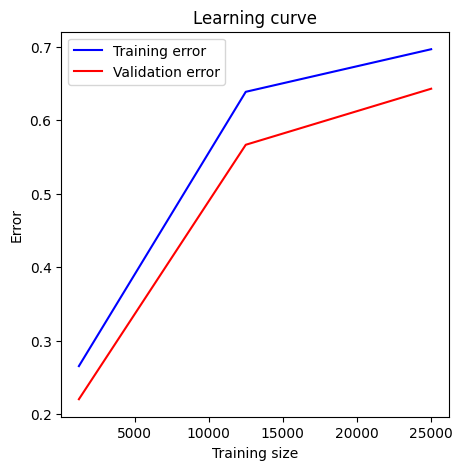

In [39]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:50000],
    y=y_train[:50000],
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training error")
plt.plot(train_sizes, test_mean, color="red",label="Validation error")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [45]:
x = final_model.cv_results_['param_model__max_depth'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [46]:
order = sorted(zip(x, y_train, y_val))
x, y_train, y_val = zip(*order)

In [86]:
#calculation of mean train and test scores from final_model.cv_results_

sum_train_score_6 = 0
sum_valid_score_6 = 0
sum_train_score_18 = 0
sum_valid_score_18 = 0

for i in range(len(x)):
  if (x[i] == 6):
    sum_train_score_6 = sum_train_score_6 + y_train_score[i]
    sum_valid_score_6 = sum_valid_score_6 + y_val_score[i]

  elif (x[i] == 18):
    sum_train_score_18 = sum_train_score_18 + y_train_score[i]
    sum_valid_score_18 = sum_valid_score_18 + y_val_score[i]

mean_train_score_6 = sum_train_score_6/3.0
mean_train_score_18 = sum_train_score_18/7.0
mean_valid_score_6 = sum_valid_score_6/3.0
mean_valid_score_18 = sum_valid_score_18/7.0

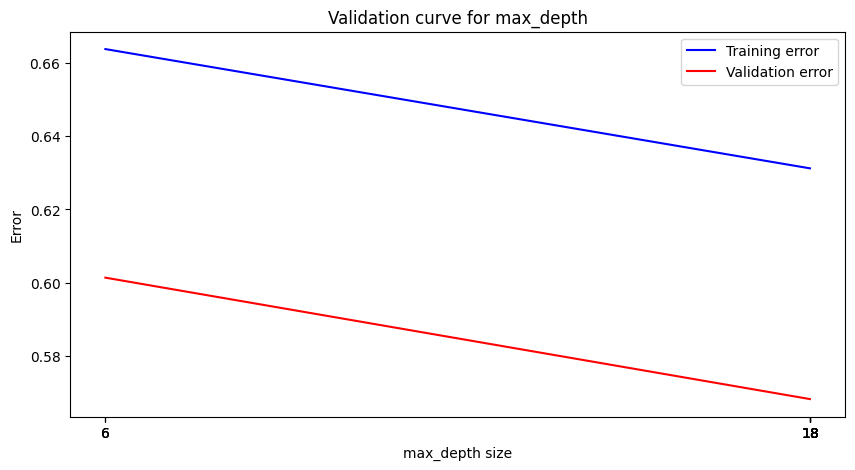

In [87]:
#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot([x[0],x[3]],[mean_train_score_6,mean_train_score_18],color="blue",label="Training error")
plt.plot([x[0],x[3]],[mean_valid_score_6,mean_valid_score_18],color="red",label="Validation error")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("max_depth size")
plt.xticks(x)
plt.ylabel("Error")
plt.title("Validation curve for max_depth")
plt.legend()
plt.show()

In [88]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_dtc.append ((fit_time, predict_time))

In [89]:
y_predict

array([2, 2, 1, ..., 2, 1, 2])

In [91]:
#Wall-clock fit and predict times
print (f"Fit time for Decision Tree classifier: {clock_time_dtc[0][0]:0.2f} seconds")
print (f"Predict time for Decision Tree classifier: {clock_time_dtc[0][1]:0.2f} seconds")

Fit time for Decision Tree classifier: 82.58 seconds
Predict time for Decision Tree classifier: 9.18 seconds


In [92]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 5729,  1035,   499,   197],
       [26758, 75265, 14527,  4633],
       [ 3810,  5367, 54135,  6581],
       [   13,    44,   129,   445]])

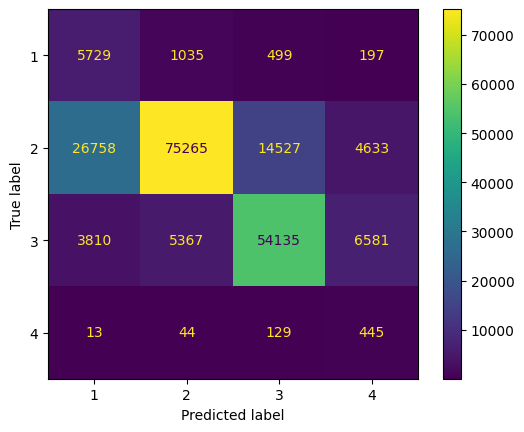

In [93]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [98]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.6807051368951684
Precision = 0.6807051368951684
Recall = 0.6807051368951684
F1 score = 0.6807051368951684


# Neural network: